<a href="https://colab.research.google.com/github/hrutkabence/tutorials/blob/master/english/machine_learning/lessons/data/pc_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application of clustering methods on point clouds**

## **1.) About clustering**

Cluster analysis or clustering is a technique that allows us to find groups of similar objects, objects that are more related to each other than to objects in other groups. During the application of clustering methods, the labels or classes are unknown. Therefore, when discussing clustering methods, we usually think of unsupervised machine learning.  

The notion of a "cluster" cannot be precisely defined, which is one of the reasons why there are so many clustering algorithms. Most of these use similarity or distance measures between points. Some clustering algorithms require specifying or guessing the number of clusters to discover in the data. In contrast, others require the specification of some minimum distance between observations in which examples may be considered “close” or “connected.”

Cluster analysis is an iterative process where subjective evaluation of the identified clusters is fed back into changes to algorithm configuration until a desired or appropriate result is achieved.

**There are several clustering algorithms:**
- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians
- etc...



## **2.) Applying different clustering methods with the help of the scikit-learn**

In the following we are going to check on some of these methods with the help of the **[scikit-learn](https://scikit-learn.org/stable/)** python library.

Scikit-learn is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

In the scikit-learn, there are several clustering algorithms. In the following table, these can be seen with some information about required parameters, typical use cases, and the principle of operation:

![clustering_methods](https://github.com/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/images/clustering_methods.png?raw=true)

**Before strating, let's import the modules first!**

In [24]:
# modules
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Let's create a test dataset!

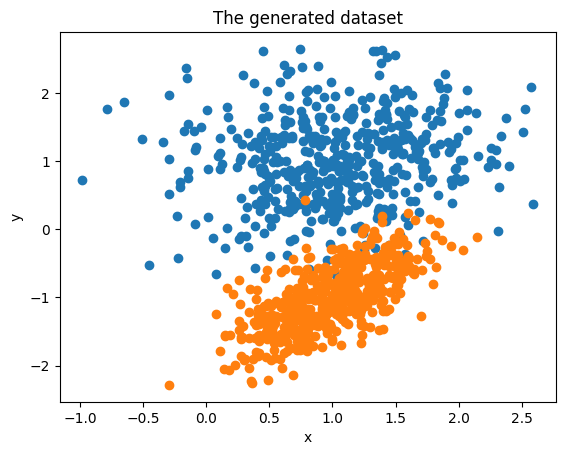

In [42]:
# define dataset
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = np.where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.title('The generated dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In the following, we will apply some clustering methods on this 'point cloud'.

## [k-Means clustering](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings%20of%20the%20Fifth%20Berkeley%20Symposium%20on%20Mathematical%20Statistics%20and%20Probability,%20Volume%201:%20Statistics/chapter/Some%20methods%20for%20classification%20and%20analysis%20of%20multivariate%20observations/bsmsp/1200512992)

It may be the most widely known clustering method. The intuition behind the algorithm is to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

 To achive it first, we choose a value for k (the number of clusters) and randomly select each cluster's initial centroid (center coordinates).

We then apply a two-step process:
- Assignment step — Assign each observation to it's nearest centre.
- Update step — Update the centroids as the center of their respective observation.

We repeat these two steps over and over until there is no further change in the clusters. At this point the algorithm has converged and we may retrieve our final clusterings.

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*oj1MBxiPfnyeQC3HnCcJiw.gif)

To use it, we have to define the *number of clusters*.

In [43]:
num_clusters = 2

After defining the parameter let's apply the algorithm to the dataset!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


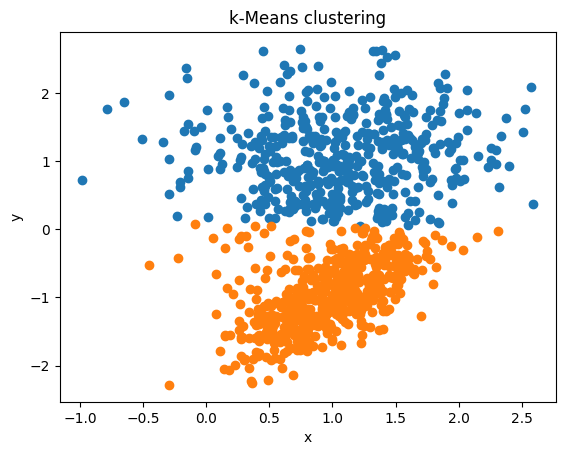

In [44]:
# from sklearn.cluster import KMeans

# define the model
model = sklearn.cluster.KMeans(n_clusters=num_clusters)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = np.unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:

	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)

	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
plt.title('k-Means clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Let's try the algorithm with a different number of cluster parameters! Let's visualize the results!

## [DBSCAN](https://www.osti.gov/biblio/421283)

The main idea of the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm is to search high-density areas surrounded by low-density ones.

It can be used on large databases with good efficiency. The usage of the DBSCAN is simple, and it requires only two parameters:

•	**eps** – defines the maximum distance (radius) between two neighbors,

•	**n_min** – defines how many surrounding points are necessary to define a core.


How does it work? Let's assume that we have sample data with 'i' elements. Choose a point from it and calculate the distances from the other points. A core point has been found if the number of points in an **eps** range is larger than the predefined **n_min** value. From this core point, other points' distances can be checked, and the size of the core points is expandable until the samples do not meet the requirements. If there are no more core points for a group, a cluster is found, and the search for other clusters can be continued. Points that are not part of any cluster are considered as noise.  

![](https://miro.medium.com/v2/resize:fit:1244/1*86gOGRXVZZaz4tmo5W8VxA.png)

Let's apply DBSCAN on the dataset!

First, let's add the required parameters!

In [47]:
epsilon = 0.15
min_points = 9

After that, let's apply the DBSCAN algorithm to the test dataset!

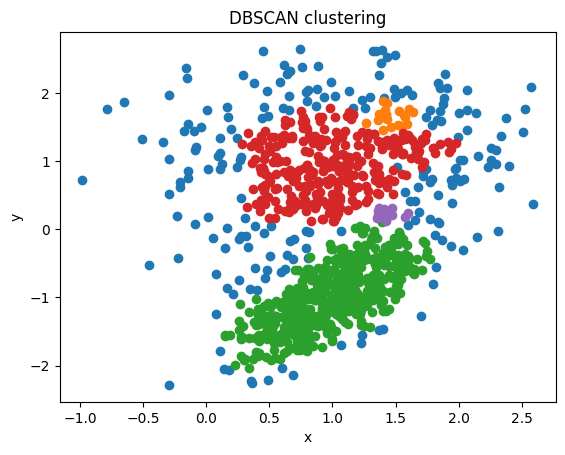

In [48]:
# define the model
model = sklearn.cluster.DBSCAN(eps = epsilon, min_samples = min_points)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters =np.unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:

	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)

	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
plt.title('DBSCAN clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

By changing the epsilon and minimum point values we can get different results. Dare to change these values!

## **3.) Applying ML-based clustering algorithm on point cloud**


The presented clustering method is helpful when we want to separate a group of points in a point cloud.

In most cases, when we would like to apply clustering on a point cloud, the number of clusters is unknown, but as we have seen above, there are several algorithms (like DBSCAN, OPTICS, mean shift) where the number of clusters doesn't have to be defined.     

Therefore, in the following section, we are going to apply the DBSCAN clustering algorithm to separate the roof points of buildings.

**First, let's download the point cloud!**

In [49]:
!wget -q https://github.com/hrutkabence/tutorials/blob/master/english/machine_learning/lessons/data/trees.ply


In [61]:
!wget -q https://github.com/hrutkabence/tutorials/raw/master/english/machine_learning/lessons/data/trees.ply

Let's install [Open3D](http://www.open3d.org)!

In [ ]:
!pip install open3d

After the installation, import modules and display the point cloud!

In [50]:
import os
import shutil
import random
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Define the input filename and the folder.

In [56]:
pc_filename = 'trees.ply'
new_folder = 'clusters'

Check and create folder for the clusters.

In [57]:
# Check the existance of the folder and create if it need
if os.path.isdir(new_folder) == True:
  shutil.rmtree(new_folder, ignore_errors=True)
  os.mkdir(new_folder)
else:
  os.mkdir(new_folder)

Load the point cloud!

In [62]:
# Import .PLY format point cloud and create a numpy array

pcd = o3d.io.read_point_cloud(pc_filename)
xyz = np.asarray(pcd.points)


Let's make a section from the point cloud, that contains the lower part of the vegetation.

In [63]:
section_width = 1.5

In [64]:
print(min(np.asarray(pcd.points)[:,2]))

0.20000675320625305


Let's use the Open3D built-in crop function to create a vertical section from a point cloud!
First, we must create an aligned bounding box to use it.

In [65]:
bounding_box = pcd.get_axis_aligned_bounding_box()
bounding_box_points = np.asarray(bounding_box.get_box_points())

With the help of the bounding box, we can crop from the point cloud.

In [66]:
bounding_box_points[:, 2] = np.clip(bounding_box_points[:, 2], a_min=min(np.asarray(pcd.points)[:,2]), a_max=min(np.asarray(pcd.points)[:,2]) + section_width)
bbox_cropped = o3d.geometry.AxisAlignedBoundingBox.create_from_points(o3d.utility.Vector3dVector(bounding_box_points))
pcd_cropped = pcd.crop(bbox_cropped)

Let's visualize the point cloud in Google Colab. The Open3D has its built-in function, but it's not working on Google Colab. Therefore, we are going to use the following function to visualize the result.

In [67]:
def draw_geometries(geometries):
    '''
    This function replaces the built-in Open3D method to visualize point clouds in the Google Colab environment.
    If you are using your computer, this function is not required.
    The function is using the plotly library.
    '''
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()

        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)

            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)

    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False),
                aspectmode = 'data', #this string can be 'data', 'cube', 'auto', 'manual'
                aspectratio=dict(x=1, y=1, z=1)
            )
        )
    )
    fig.show()

After that, the point cloud can be presented with these simple lines.

In [68]:
o3d.visualization.draw_geometries = draw_geometries # replace function
o3d.visualization.draw_geometries([pcd_cropped])

Lets' define the parameters to apply DBSCAN algorithm!

In [69]:
eps = 0.5
min_points = 50

At this time we are going to use the Open3D built-in DBSCAN method.

In [71]:
# Labelling with the DBSCAN
labels = np.array(pcd_cropped.cluster_dbscan(eps, min_points))

Let's create a script to export point clouds by clusters with random colors!

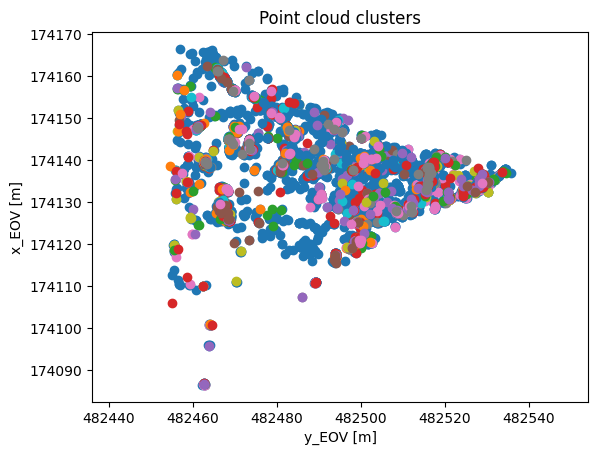

Point cloud has 17 clusters


In [72]:

# Add clusters for loop
clusters = np.unique(labels)

# Save clusters into point clouds                                       TODO: condition aon the min. number of points
for cluster in clusters:

  # Get row indexes for samples with this cluster
  row_ix = np.where(labels == cluster)

  # Create scatter of these samples
  plt.scatter(xyz[row_ix, 0], xyz[row_ix, 1], label=str(cluster)+' cluster')

  # Export the clusters as a point cloud
  xyz_cluster = xyz[row_ix]
  pc_cluster = o3d.geometry.PointCloud()
  pc_cluster.points = o3d.utility.Vector3dVector(xyz_cluster)

  # Add a color to the point cloud
  col_r = np.full((np.shape(pc_cluster.points)[0], 1), random.uniform(0, 1))      # Create random colors for point clouds
  col_g = np.full((np.shape(pc_cluster.points)[0], 1), random.uniform(0, 1))
  col_b = np.full((np.shape(pc_cluster.points)[0], 1), random.uniform(0, 1))
  col = np.concatenate((col_r, col_g, col_b), axis=1)                             # Merge RGB values
  pc_cluster.colors = o3d.utility.Vector3dVector(col)

  # Write into a file
  if cluster >= 0:
    o3d.io.write_point_cloud(new_folder+'/cluster_' + str(cluster) + '.ply', pc_cluster) # export .ply format
  else:
    o3d.io.write_point_cloud(new_folder+'/noise.ply', pc_cluster) # export noise

# Show plot
plt.title('Point cloud clusters')
plt.xlabel('y_EOV [m]')
plt.ylabel('x_EOV [m]')
plt.axis('equal')
plt.show()

# Display point cloud
max_label = labels.max()
print(f"Point cloud has {max_label + 1} clusters")


In [73]:
# Show result in Open3D
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd_cropped.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Display point cloud
o3d.visualization.draw_geometries([pcd_cropped])

Here some lines to download a folder from Google Colab:

In [75]:
!zip -r /content/clusters.zip /content/clusters

  adding: content/clusters/ (stored 0%)
  adding: content/clusters/cluster_3.ply (deflated 60%)
  adding: content/clusters/cluster_13.ply (deflated 58%)
  adding: content/clusters/cluster_12.ply (deflated 60%)
  adding: content/clusters/cluster_7.ply (deflated 61%)
  adding: content/clusters/cluster_1.ply (deflated 60%)
  adding: content/clusters/cluster_10.ply (deflated 58%)
  adding: content/clusters/cluster_15.ply (deflated 55%)
  adding: content/clusters/cluster_6.ply (deflated 58%)
  adding: content/clusters/noise.ply (deflated 66%)
  adding: content/clusters/cluster_0.ply (deflated 55%)
  adding: content/clusters/cluster_9.ply (deflated 62%)
  adding: content/clusters/cluster_4.ply (deflated 58%)
  adding: content/clusters/cluster_8.ply (deflated 59%)
  adding: content/clusters/cluster_11.ply (deflated 58%)
  adding: content/clusters/cluster_5.ply (deflated 64%)
  adding: content/clusters/cluster_14.ply (deflated 54%)
  adding: content/clusters/cluster_16.ply (deflated 54%)
  add

In [77]:
from google.colab import files
files.download('/content/clusters.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Task**
 - Test the different clustering algorithms on a different dataset!
 - Check the [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) and use other algorithms!

#Sources
- https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c
- https://scikit-learn.org/stable/index.html
- https://machinelearningmastery.com/clustering-algorithms-with-python/
- https://uk.mathworks.com/content/dam/mathworks/ebook/gated/machine-learning-ebook-all-chapters.pdf
- https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained
